In [11]:
import os
from ast import literal_eval
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from base import sns_markers

In [2]:
n = 512 # we use 512 and 1024

In [3]:
df = pd.DataFrame()

for alg in ["mmd", "mmdew"]:
    for dataset in ["normalLaplace", "normalMixed", "normalUnif"]:
        directory = f"../../results_rebuttal/{dataset}/n={n}/{alg}"
        files = os.listdir(directory)
        for f in files:
            df = pd.concat((df,pd.read_csv(directory + "/" + f, index_col=0)))

In [4]:
df.head()

,algorithm,dataset,actual_cps,detected_cps,detected_cps_at,runtime,config,rep
0,MMD,NormalToLaplace1024,[512],[],[564],1.916419,$\alpha = 0.021544346900318832$,0
0,MMD,NormalToLaplace1024,[512],[],[556],1.639091,$\alpha = 0.021544346900318832$,1
0,MMD,NormalToLaplace1024,[512],[],[576],1.640300,$\alpha = 0.021544346900318832$,2
0,MMD,NormalToLaplace1024,[512],[],[568],1.662840,$\alpha = 0.021544346900318832$,3
0,MMD,NormalToLaplace1024,[512],[],[560],1.676127,$\alpha = 0.021544346900318832$,4


In [5]:
df["alpha"] = df["config"].str[10:-1].astype(float)

In [6]:
for col in ["detected_cps_at"]:
    df.loc[:,col] = df.loc[:,col].apply(lambda x : np.array(literal_eval(x) + [2*n])) # no empty lists

In [7]:
df["mtd"] = df["detected_cps_at"].apply(lambda z : np.min(np.where(z-n<0,2*n,z-n))) # find first cp after change occured

In [8]:
df["alg+dataset"] = df["algorithm"] + " " + df["dataset"].str[8:-4]

In [15]:
hues = df["alg+dataset"].unique()

In [16]:
sns_markers(hues)

{'markers': {'MMD Laplace': '*',
  'MMD Mixed': 'd',
  'MMD Unif': 'X',
  'MMDEW Laplace': 'P',
  'MMDEW Mixed': 'o',
  'MMDEW Unif': 'v'}}

<Axes: xlabel='alpha', ylabel='mtd'>

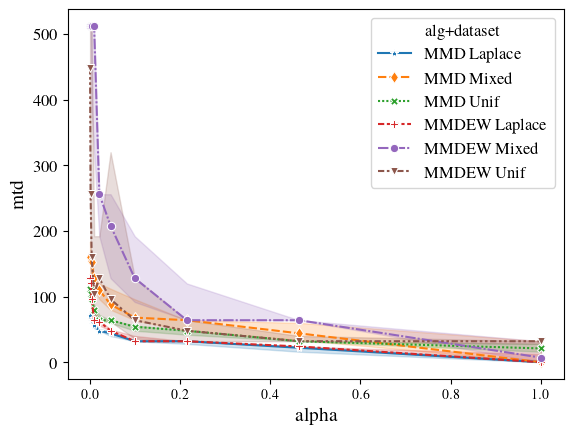

In [18]:
sns.lineplot(data=df, x="alpha", y="mtd", hue="alg+dataset", estimator="median", style="alg+dataset", **sns_markers(df["alg+dataset"].unique()))

In [10]:
df.to_csv(f"../../results_rebuttal/mtd-{n}.csv")